# Physics 248R - Section 1
## September 8, 2020

### TF: Brendon Bullard

About me: I'm a G4 in Masahiro's group. I worked on the ATLAS Muon Spectrometer magnetic field map for my qualification task. Worked on ITk strips at BNL in 2017, dabbled in New Small Wheel since June 2019. Added quark-gluon tagging to the search for Higgs decaying to 2 muons. Now I work on differential cross section measurement for ttW.

### Structure of sections
Weekly sections at 9:30-11 AM Eastern time. I will prepare a 15-30 minute presentation, followed by office-hour style discussions/help session. Sections will be recorded, but obviously watching a recorded office hour probably won't help you with your specific question. The presentations will supplement Masahiro's lectures, either by covering something mentioned in lecture more in-depth or presenting a topic that will be useful for the current homework. The discussion filling the rest of the time slot will be a good time to ask questions about the lectures that were unclear or issues with the homework.

### Homeworks
The homeworks are a mix of numerical simulations, fitting, and plotting interspersed with explanations and derivations. Since everyone in the class knows Python, I highly recommend that everyone write up their problem sets as Jupyter notebooks. I will also be writing my section notes as Jupyter notebooks. 

For those who have never used these before, you can read the instructions for installation [here](https://test-jupyter.readthedocs.io/en/latest/install.html). The installer runs with Python 3, so if for some reason you need to have Python 2 (e.g. you like to run MadGraph) you may need to be careful when installing. Jupyter Notebooks are documents (`.ipynb`) composed of code and text cells that can be run separately (with shift+enter/return). The text cells are written in markdown for nice formatting (some markdown cheatsheets here [1](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) [2](https://www.markdownguide.org/cheat-sheet/)). They also support $\LaTeX$ typesetting, e.g.

$$g(x\,|\,\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

Here's an example of a separate text cell that can be edited separately. The next cell is a Python code block.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0,10,50)
y = 4 + x - x**2

In [ ]:
plt.plot(x,y,'-r')
plt.xlabel('Dummy Variable', fontsize=15)
plt.ylabel('Something Else', fontsize=15)
plt.show()

# Fitting Functions to Data

The first problem set asks you to consider the $p_T$ and $d_0$ resolution achievable by a generic silicon tracking detector. Tracks are obtained by fitting hits in the sensors to some parameterization of a charged particle's trajectory. I want to discuss fitting a bit in detail in case people have only ever used fitting packages before and never understood what was actually going on. 

There are lots of ways to do curve fitting, but most of the time in particle physics we talk about $\chi^2$-fitting. To do it, you find the parameter values $\theta_0,\dots,\theta_n$ of the track parameterization $t(x\,|\,\vec{\theta})$ which minimize the quantity
$$\chi^2(\vec{\theta}) = \sum_{i=1}^n\frac{(y_i-t(x_i|\theta))^2}{\sigma_i^2}$$
Here, the $x_i$ coordinates are the locations at which you measure the track trajectory (i.e. sensor locations), $y_i$ are the measured points, and $\sigma_i$ is the uncertainty on $y_i$.

# The Likelihood Function

To understand when it is appropriate to use the $\chi^2$ for fitting, one needs to understand Maximum Likelihood estimation. The likelihood function is used ubiquitously in particle physics and will be covered in much more detail later in the course. The basic idea is to construct a function that tells you the likelihood of having measured the data $\{y_i\}$ given the true parameterization of your function $\vec{\theta}$ which generated the data. 

### Example: Straight track fitting
Imagine you're tracking cosmic ray muons with the ATLAS New Small Wheel muon detector. The cosmic ray muons fly straight when you don't have a magnetic field, so you can parameterize the trajectory by the function $f(x\,|\,a_0,a_1) = a_0 + a_1x$. Then you measure the y-coordinate data $\{y_i\}_{i=1}^n$ taken at points $\{x_i\}_{i=1}^n$. If the measurement uncertainties of $y_i$ is all the same value $\sigma$ and are gaussian distributed, then you can construct a likelihood function:

$$\mathcal{L}(a_0,a_1)= p(\vec{y}\,|\,a_0,a_1) = \prod_{i=1}^n\left\{\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{[y_i-f(x_i\,|\,a_0,a_1)]^2}{2\sigma^2}\right)\right\}$$

Here, you have a gaussian for each of the data points. A good estimate for the true values of $a_0$ and $a_1$ for the muon that generated this data are the values $(\hat{a_0},\hat{a_1})$ which *maximimize the likelihood*. Usually we deal with the natural logarithm of the likelihood instead of the likelihood itself, but both are maximized at the same point. Taking the log, we see

$$\ln \mathcal{L}(a_0,a_1) = \sum_{i=1}^n\left\{-\frac{1}{2}\ln(2\pi\sigma^2)-\frac{(y_i-f(x_i\,|\,a_0,a_1))^2}{2\sigma^2}\right\} = -\frac{n}{2}\ln(2\pi\sigma^2) - \sum_{i=1}^n\frac{(y_i-f(x_i\,|\,a_0,a_1))^2}{2\sigma^2}$$

Since the first term is a constant, maximizing the log-likelihood is equivalent to maximizing only the second term, which is exactly the same as minimizing the $\chi^2$. From this you see that the $\chi^2$ is only appropriate to use if your data $y_i$ are gaussian distributed. The maximum-likelihood estimate $(a_0,a_1)$ can be found by taking derivatives and setting equal to zero:

$$\frac{\partial\ln\mathcal{L}}{\partial a_0} = \frac{1}{\sigma^2}\sum_{i=1}^n (y_i-a_0-a_1x_i) = 0$$
$$\frac{\partial\ln\mathcal{L}}{\partial a_1} = \frac{1}{\sigma^2}\sum_{i=1}^n (y_i-a_0-a_1x_i)x_i = 0$$

These are two linear equations in two variables, so we can find the solution. This gives us the best fit values $(\hat{a_0},\hat{a_1})$.

Once you've computed the best fit values, you would want to know what the uncertainty is on those parameter estimates. To do this, you need to calculate the covariance matrix. The first step in doing so is to construct the *Fisher information matrix*, which is the Hessian matrix of second derivatives of the log-likelihood. The covariance matrix is obtained by taking the negative inverse of the Fisher information matrix. 

$$I_{00}=\frac{\partial^2\ln\mathcal{L}}{\partial a_0^2} = \frac{n}{\sigma^2}$$
$$I_{01}=I_{10}=\frac{\partial^2\ln\mathcal{L}}{\partial a_0 \partial a_1} = -\frac{1}{\sigma^2} \sum_{i=1}^n x_i$$
$$I_{11}=\frac{\partial^2\ln\mathcal{L}}{\partial a_1^2} = -\frac{1}{\sigma^2} \sum_{i=1}^n x_i^2$$


$$I=-\frac{1}{\sigma^2}\begin{bmatrix}
n & \sum x_i \\
\sum x_i & \sum x_i^2 
\end{bmatrix}$$

Taking the negative inverse of this gives us the covariance matrix:

$$C=-I^{-1} = \frac{\sigma^2}{n\sum x_i^2 - (\sum x_i)^2} \begin{bmatrix}
\sum x_i^2 & -\sum x_i \\
-\sum x_i & n 
\end{bmatrix}$$

The uncertainty on $a_0$ and $a_1$ from the fit are the square root of the diagonal elements:

$$\sigma(a_0) = \sigma\sqrt{\frac{\sum x_i^2}{n\sum x_i^2 - (\sum x_i)^2}}$$
$$\sigma(a_1) = \sigma\sqrt{\frac{n}{n\sum x_i^2 - (\sum x_i)^2}}$$

Let's compare this to some randomly generated data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

a0 = 15 # cm
a1 = -0.5 # cm/cm
sigma = 0.2 # cm
n = 100
x = np.linspace(5,20,n)
y = (a0+a1*x) + np.random.normal(0,sigma,n)

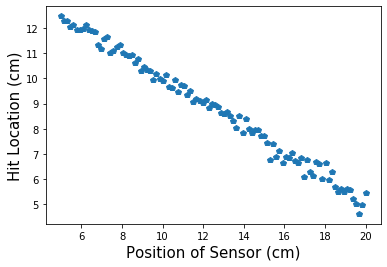

In [7]:
plt.plot(x,y,'p')
plt.xlabel("Position of Sensor (cm)",fontsize=15)
plt.ylabel("Hit Location (cm)",fontsize=15)
plt.show()

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)
print("Best fit a_0 from fitter: "+str(intercept))
print("Best fit a_1 from fitter: "+str(slope))

Best fit a_0 from fitter: 14.942184176429935
Best fit a_1 from fitter: -0.49302254777554294


In [9]:
a = np.array([[n,sum(x)],[sum(x),sum(x**2)]])
b = np.array([sum(y), sum(y*x)])
[a0_maxL, a1_maxL] = np.linalg.solve(a,b)
print("Best fit a_0 from log likelihood: "+str(a0_maxL))
print("Best fit a_1 from log likelihood: "+str(a1_maxL))

Best fit a_0 from log likelihood: 14.942184176429922
Best fit a_1 from log likelihood: -0.49302254777554183


In [10]:
sig_a0_maxL = sigma*np.sqrt(sum(x**2)/(n*sum(x**2)-sum(x)**2))
sig_a1_maxL = sigma*np.sqrt(n/(n*sum(x**2)-sum(x)**2))
print("Uncertainty of best fit a_0 from log likelihood: "+str(sig_a0_maxL))
print("Uncertainty of best fit a_1 from log likelihood: "+str(sig_a1_maxL))

Uncertainty of best fit a_0 from log likelihood: 0.06055845715235208
Uncertainty of best fit a_1 from log likelihood: 0.004572842779837163


# Summary

Doing $\chi^2$ fits is only appropriate when your data is Gaussian distributed (which is usually a safe assumption). But if you were fitting a function to a histogram of counts and the bin contents are small, the data is really Poisson distributed and you may need to actually construct the likelihood to do the fit properly. 

You can use fitting packages to compute best-fits to data, but it's useful to know what's going on under the hood. It's also possible to compute these by hand when the models aren't complicated and the number of parameters is small (otherwise you're computing $O(n_{param}^2)$ derivatives to calculate the covariance). It's pretty much always best to just pick a good fitting package and let it do all the work for you.